In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('concrete.csv')

In [3]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
data.shape

(1030, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


<Figure size 1368x648 with 0 Axes>

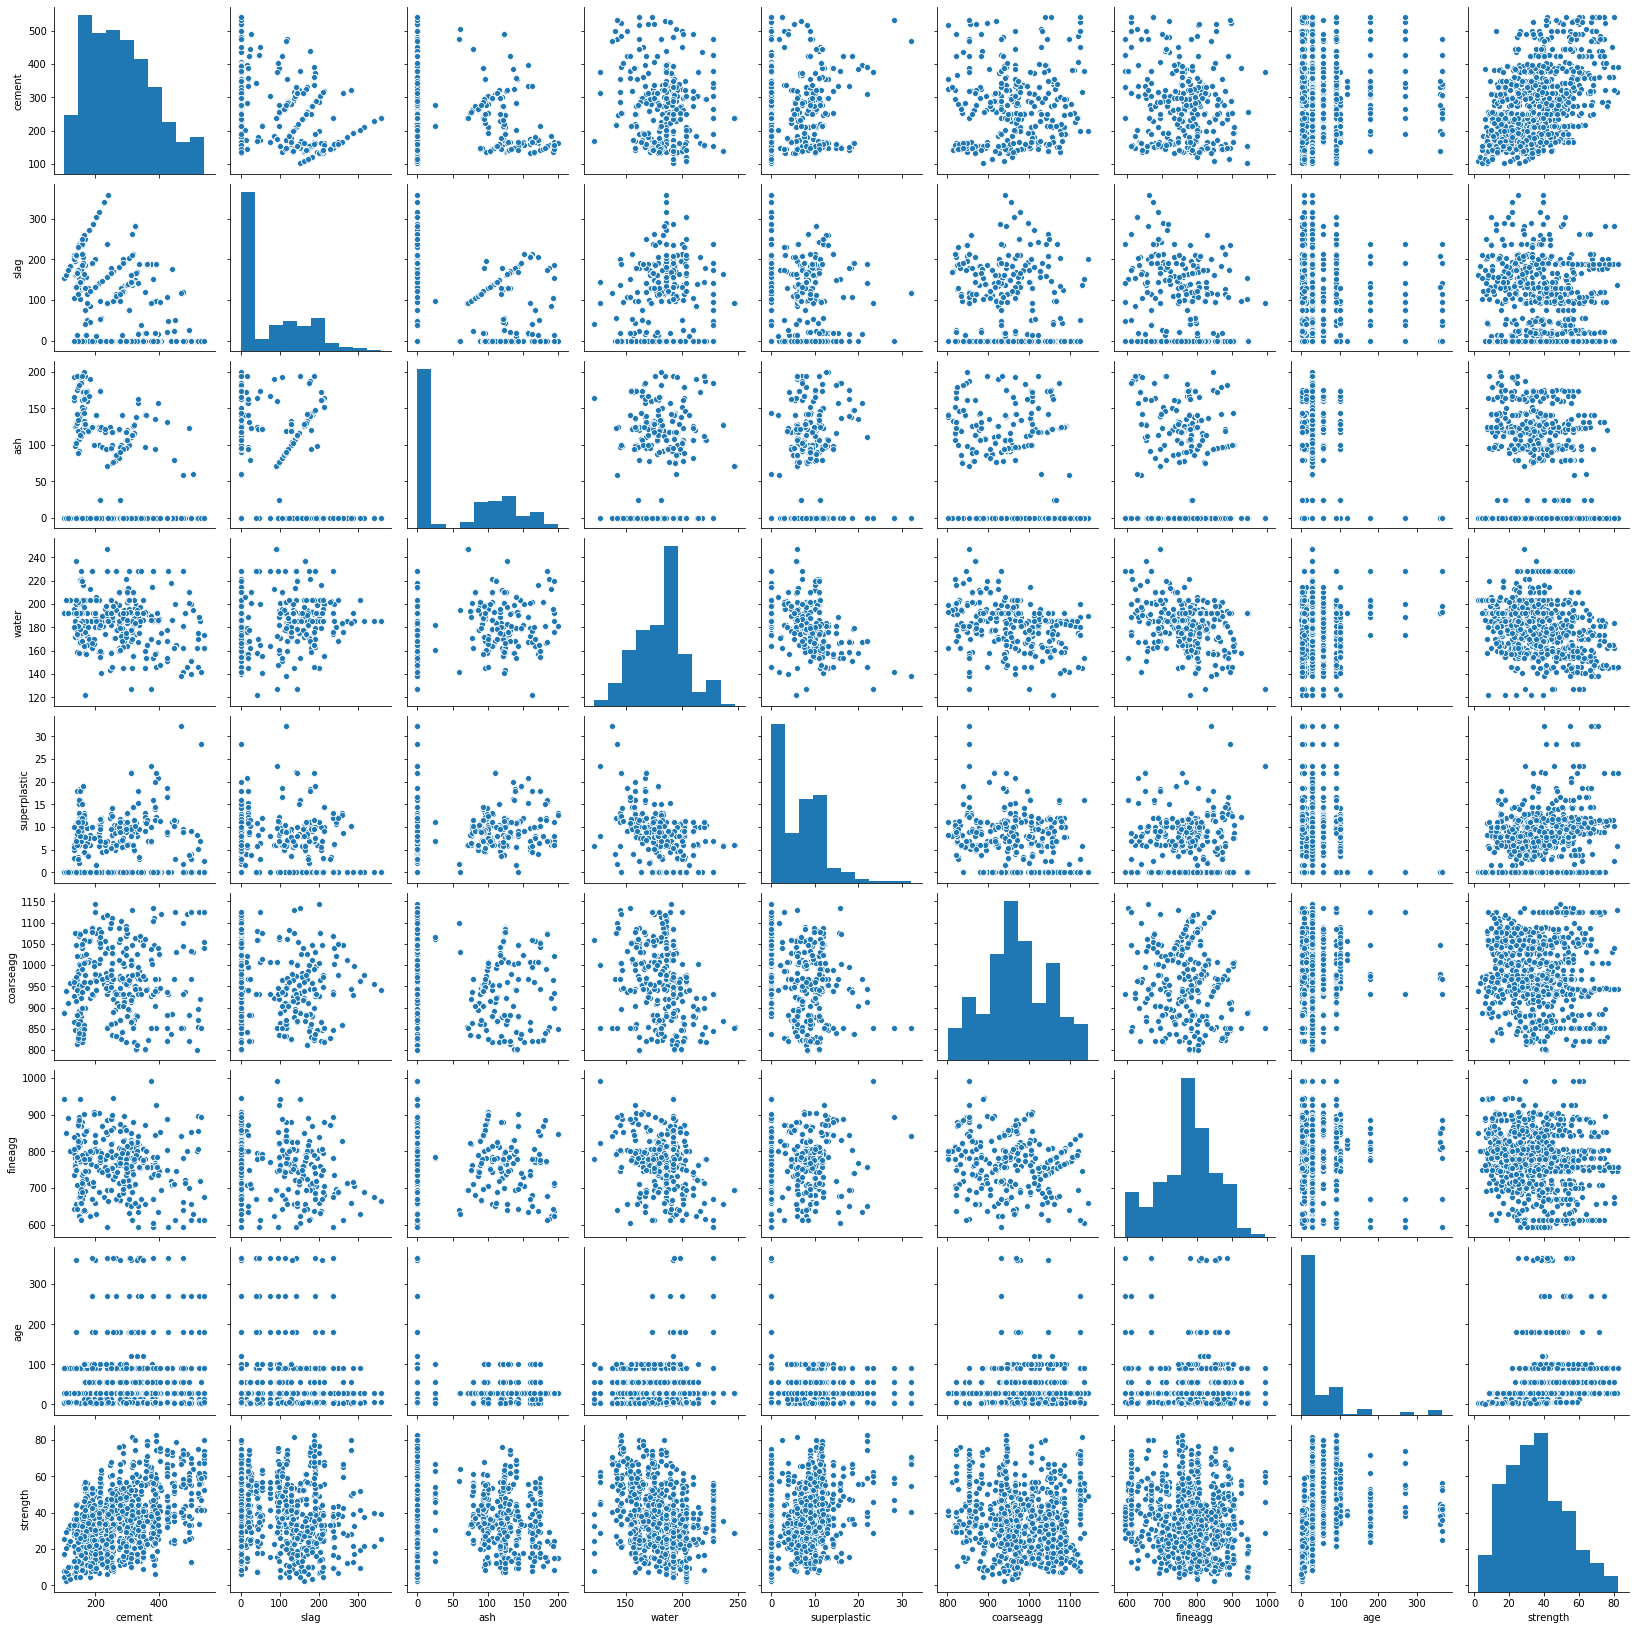

In [8]:
plt.figure(figsize=(19,9))

sns.pairplot(data)

plt.show()

In [25]:
cor = data.drop('strength',1).corr()

In [26]:
cor

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000


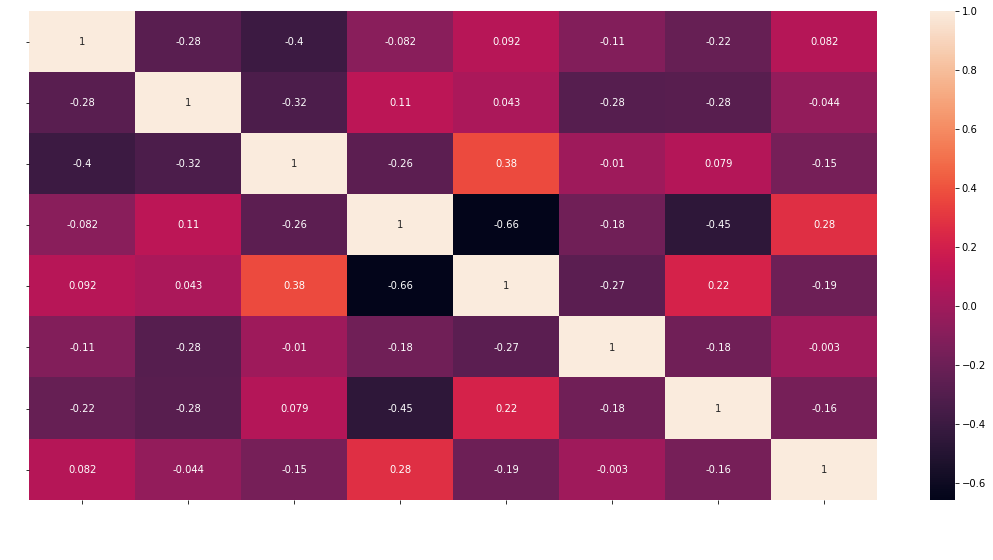

In [27]:
plt.figure(figsize=(19,9))

sns.heatmap(cor,annot=True)
plt.xticks(fontsize=15,color='white',rotation=20)
plt.yticks(fontsize=15,color='white')

plt.show()

In [30]:
cor = data.corr()['strength']

In [32]:
cor.sort_values()

water          -0.289633
fineagg        -0.167241
coarseagg      -0.164935
ash            -0.105755
slag            0.134829
age             0.328873
superplastic    0.366079
cement          0.497832
strength        1.000000
Name: strength, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [35]:
temp = StandardScaler().fit_transform(data.drop('strength',1))

In [36]:
concrete = pd.DataFrame(temp,columns=data.columns[:-1])

In [37]:
concrete['Strength'] = data.strength

In [38]:
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,Strength
0,-1.339017,1.601441,-0.847144,1.027590,-1.039143,-0.014398,-0.312970,-0.279733,29.89
1,-1.074790,-0.367541,1.096078,-1.090116,0.769617,1.388141,0.282260,-0.501465,23.51
2,-0.298384,-0.856888,0.648965,0.273274,-0.118015,-0.206121,1.093371,-0.279733,29.22
3,-0.145209,0.465044,-0.847144,2.175461,-1.039143,-0.526517,-1.292542,-0.279733,45.85
4,-1.209776,1.269798,-0.847144,0.549700,0.484905,0.958372,-0.959363,-0.279733,18.29


In [42]:
xTrain,xTest, yTrain,yTest = train_test_split(concrete.drop('Strength',1),concrete.Strength,test_size=0.2)

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
rf  = RandomForestRegressor()

In [44]:
rf = rf.fit(xTrain,yTrain)

In [53]:
temp = pd.Series(rf.feature_importances_)

In [55]:
for x,y  in zip(temp,concrete.columns):
    print(x,'\t',y)


0.3246744057959073 	 cement
0.07677422928810813 	 slag
0.01673091376510308 	 ash
0.10529869774327295 	 water
0.07383927647465358 	 superplastic
0.027771190479218846 	 coarseagg
0.03966926061277651 	 fineagg
0.3352420258409598 	 age


In [56]:
# so I decided to eliminate the feature who have value less than 0.05

In [58]:
copyData = concrete.copy()

In [64]:
copyData.drop('Strength',1,inplace=True)

In [66]:
copyData.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,-1.339017,1.601441,-0.847144,1.027590,-1.039143,-0.014398,-0.312970,-0.279733
1,-1.074790,-0.367541,1.096078,-1.090116,0.769617,1.388141,0.282260,-0.501465
2,-0.298384,-0.856888,0.648965,0.273274,-0.118015,-0.206121,1.093371,-0.279733
3,-0.145209,0.465044,-0.847144,2.175461,-1.039143,-0.526517,-1.292542,-0.279733
4,-1.209776,1.269798,-0.847144,0.549700,0.484905,0.958372,-0.959363,-0.279733


In [73]:
copyData.drop(copyData.columns[temp<0.05],1,inplace=True)

In [74]:
copyData.head()

,cement,slag,water,superplastic,age
0,-1.339017,1.601441,1.027590,-1.039143,-0.279733
1,-1.074790,-0.367541,-1.090116,0.769617,-0.501465
2,-0.298384,-0.856888,0.273274,-0.118015,-0.279733
3,-0.145209,0.465044,2.175461,-1.039143,-0.279733
4,-1.209776,1.269798,0.549700,0.484905,-0.279733


In [77]:
xTrain,xTest, yTrain,yTest = train_test_split(copyData,concrete.Strength,test_size=0.2)

In [78]:
xTrain.shape

(824, 5)

In [79]:
from keras.models import Sequential
from keras.layers import Dense

In [124]:
model = Sequential()

In [92]:
model.add(Dense(20,activation ='relu',input_shape=(5,)))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [93]:
model.fit(xTrain,yTrain,epochs=100,verbose=0,validation_data=(xTest,yTest))

In [94]:
model.evaluate(xTrain,yTrain)

824/824 [==============================] - 0s 33us/step


40.485828584837684

In [95]:
model.evaluate(xTest,yTest)

206/206 [==============================] - 0s 61us/step


43.20688577300137

In [98]:
temp = pd.DataFrame(model.history.history)

In [104]:
temp.head()

,val_loss,loss
0,1543.551096,1525.971808
1,1460.264187,1459.564036
2,1283.265031,1330.690261
3,951.640815,1071.752952
4,534.044033,684.856037


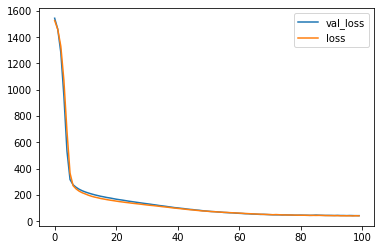

In [106]:
temp.plot()

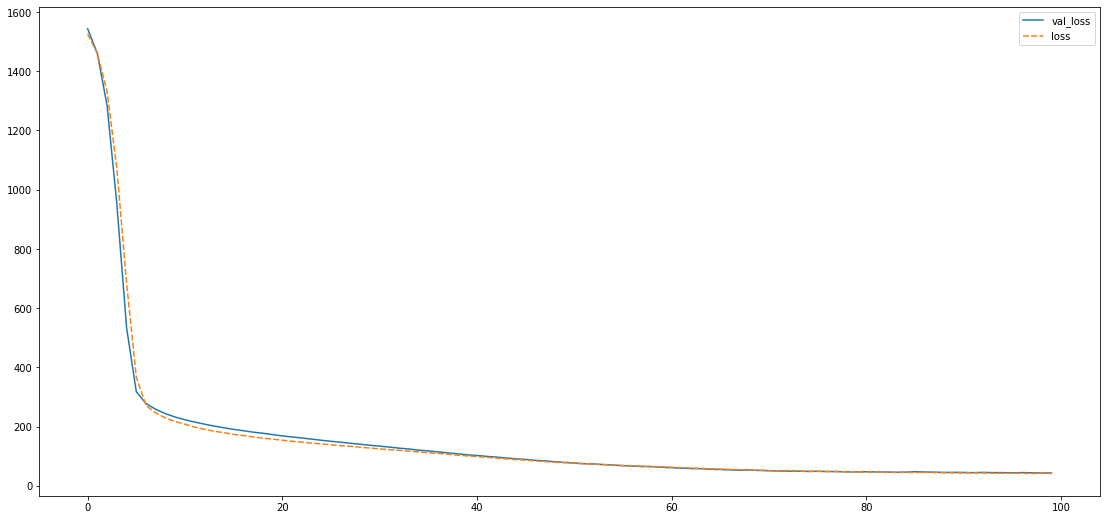

In [113]:
plt.figure(figsize=(19,9))

sns.lineplot(data=temp)

plt.show()

In [107]:
# the neural network fine not getting overfitted

In [108]:
pred = model.predict(xTest)

In [109]:
predData = pd.DataFrame({'Actual':yTest,'Predicted':pred.flatten()})

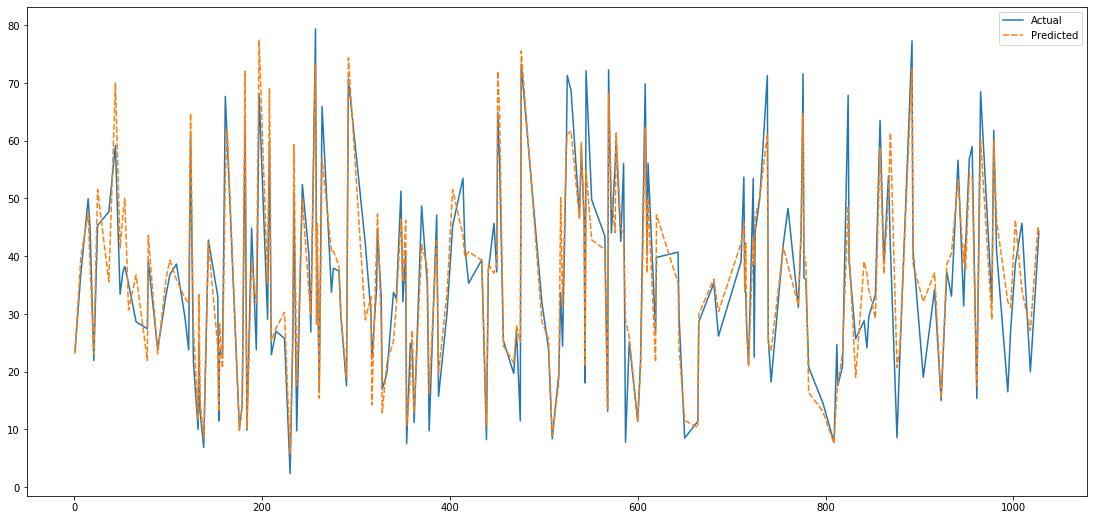

In [112]:
plt.figure(figsize=(19,9))

sns.lineplot(data=predData)

plt.show()

In [114]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [115]:
r2_score(yTest,pred)

0.8546762810033034

In [116]:
mean_absolute_error(yTest,pred)

5.031801430044822

In [117]:
mean_squared_error(yTest,pred)

43.20688457129297

In [118]:
# now building up the model with all the features

In [119]:
xTrain,xTest, yTrain,yTest = train_test_split(concrete.drop('Strength',1),concrete.Strength,test_size=0.2)

In [125]:
model.add(Dense(20,activation ='relu',input_shape=(8,)))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [126]:
model.fit(xTrain,yTrain,verbose=0,epochs=100)

In [128]:
hisData = pd.DataFrame(model.history.history)

In [129]:
hisData.head()

,loss
0,1504.656757
1,1408.320212
2,1205.003993
3,844.009458
4,469.972428


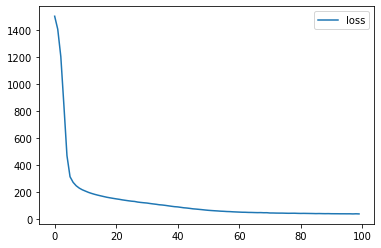

In [130]:
hisData.plot()

In [131]:
pred = model.predict(xTest)

In [132]:
predData = pd.DataFrame({'Actual':yTest,'Predicted':pred.flatten()})

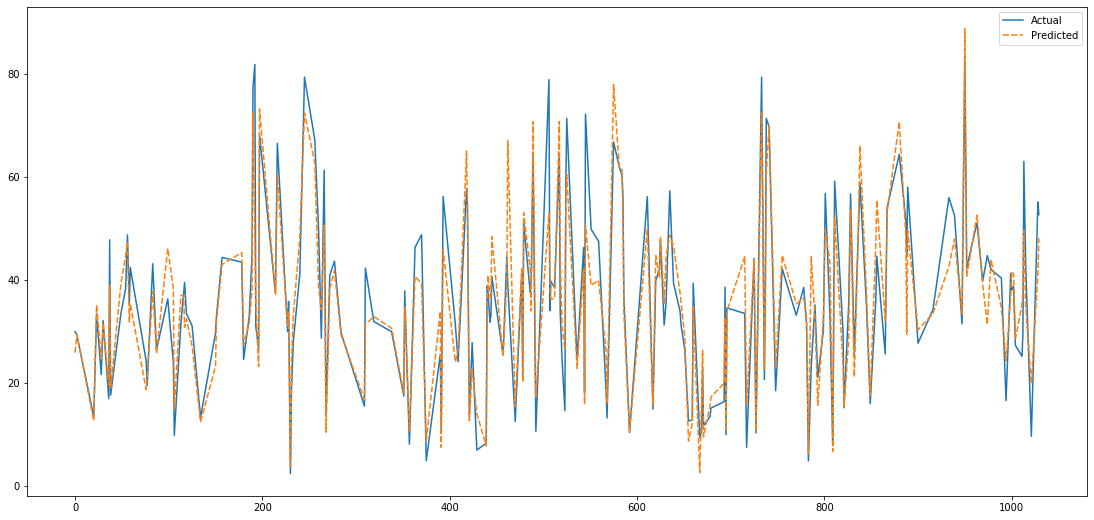

In [133]:
plt.figure(figsize=(19,9))

sns.lineplot(data=predData)

plt.show()

In [134]:
r2_score(yTest,pred)

0.8409475896383685

In [135]:
# as per conclusion we can bear to reomve those 3 features from dataFrame